In [1]:
#using TaylorSeries
include("UndrivenHelium.jl")
#include("Integ.jl")
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, legend = :false, size=(600,600), color=:black, markersize = 0.3 )
const Z = 2.0
#const order = 20
const t0 = 0.0
const t_max = 0.5 
#const abs_tol = 1.0E-20
const steps = 500_000

500000

In [2]:
include("Integ.jl")

taylorintegps (generic function with 1 method)

In [3]:
function orderTaylor(n::Int = 10,m::Int = 15; abs_tol = 1.0e-20)
    @assert m > n
    q0 = condini1D(5.0, 0.0)
    es = zeros(10_000, m - n + 1)
    ne = zeros(m - n + 1)
    for j in n:m
        tvS, xvS = taylorinteg(undrivenHelium1D!, q0, 0.0, 30.0, j, abs_tol, maxsteps=10_000)
        ll, la  = size(xvS)
        if ll > 10_000
            ll = 10_000
        end
        
        for k in 1:ll
            es[k, j - (n - 1)] = regHam1D(xvS[k,:])/eps()
        end
    end
    
    for j in eachindex(ne)
        ne[j] = norm(es[:,j], Inf)
    end
    
    return ne
end

function orderTol(n::Int = 10,m::Int = 15; order = 34)
    @assert m > n
    q0 = condini1D(5.0, 0.0)
    es = zeros(10_000, m - n + 1)
    ne = zeros(m - n + 1)
    for j in n:m
        tvS, xvS = taylorinteg(undrivenHelium1D!, q0, 0.0, 30.0, order, 1*10.0^(-j), maxsteps=10_000)
        ll, la  = size(xvS)
        if ll > 10_000
            ll = 10_000
        end
        
        for k in 1:ll
            es[k, j - (n - 1)] = regHam1D(xvS[k,:])/eps()
        end
    end
    
    for j in eachindex(ne)
        ne[j] = norm(es[:,j], Inf)
    end
    
    return ne
end

orderTol (generic function with 3 methods)


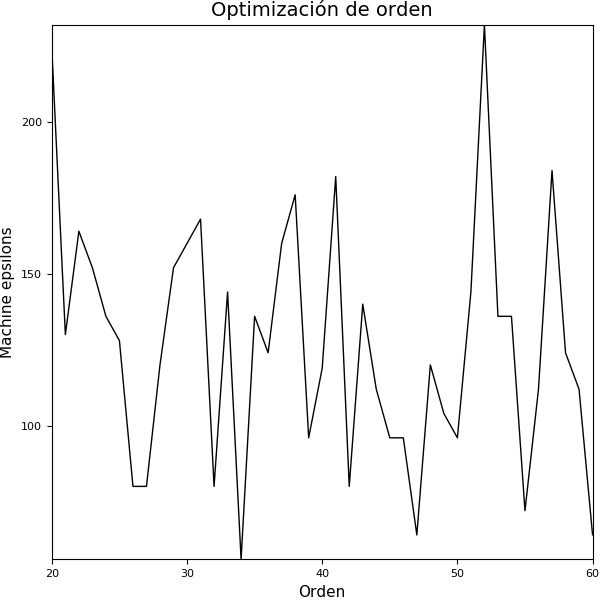

In [4]:
es1 = orderTaylor(20, 60)
plot(20:60,es1)
title!("Optimización de orden")
yaxis!("Machine epsilons")
xaxis!("Orden")


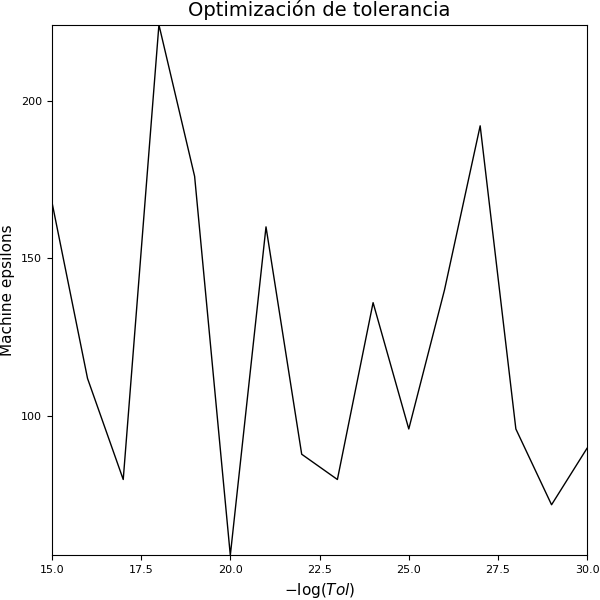

In [5]:
es2 = orderTol(15, 30)
plot(15:30,es2)
title!("Optimización de tolerancia")
yaxis!("Machine epsilons")
xaxis!(L"-\log(Tol)")

In [6]:
#ORDEN CON MINIMO ERRROR
min1 = norm(es1, -Inf)
ind1 = 0
for j in eachindex(es1)
    if es1[j] == min1
        ind1 = j
    end
end
min1, ind1 + 19

(56.0, 34)

In [7]:
#TOLERANCIA CON MINIMO
min2 = norm(es2, -Inf)
ind2 = 0
for j in eachindex(es2)
    if es2[j] == min2
        ind2 = j
    end
end
min2, ind2 + 14

(56.0, 20)